In [1]:
from IPython.display import HTML, IFrame, YouTubeVideo, Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matplotlib.style.use('seaborn-talk')

# "Tidy" Data in Python: Embracing the Long DataFrame

## Nick Del Grosso, PyData München

In [3]:
IFrame('https://www.tidyverse.org/', width=800, height=600)

## Today's Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

## Today's Data will be...

In [7]:
from statsmodels import datasets
IFrame('http://www.statsmodels.org/stable/datasets/index.html', width=900, height=600)

## Our Sample Dataset for the Evening: World Fertility Rates!

![title](https://mereorthodoxy.com/wp-content/uploads/2017/05/landscape_movies-children-of-men.jpg)

## Downloading the Data

In [8]:
from statsmodels import datasets
df = datasets.fertility.load_pandas().data
df.columns = df.columns.str.replace(' ', '')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


In [9]:
df['CountryName'].dtype

dtype('O')

In [10]:
df.to_csv('worldbankdata.csv')

## The "DataFrame" Package": Pandas

In [11]:
IFrame('http://pandas.pydata.org/', width=800, height=600)

## Review of Pandas: Summarizing, Filtering, Selecting, Transforming, Aggregating, and Plotting

In [12]:
df[[str(year) for year in range(1960, 1969)]].head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968
0,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671
3,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375
4,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268


In [13]:
import numpy as np
np.transpose(df).head(1)

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
CountryName,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe


In [14]:
df.transpose().head(1)

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
CountryName,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe


In [15]:
df.T.head(1)

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
CountryName,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe


In [16]:
df2 = df.copy()
for col in ['CountryCode', 'IndicatorName', 'IndicatorCode']:
    del df2[col]
df2.set_index('CountryName', inplace=True)
df2.columns.name = 'Year'
df2.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


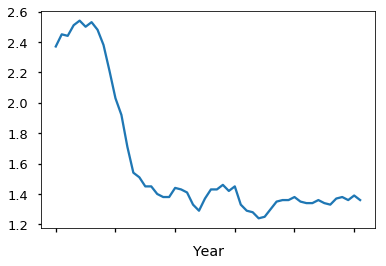

In [17]:
df2.loc['Germany'].plot()

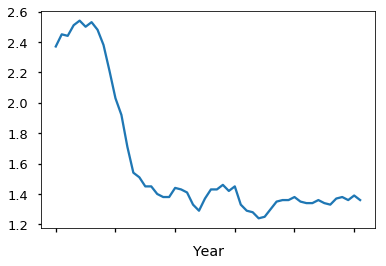

In [18]:
df2.T['Germany'].plot()

## Question: How Has Germany's Fertility Rate Changed over Time?

### Minor Note:  Handling NaNs

In [19]:
df2 = df2.T.iloc[:-3].T
df2.fillna(method='bfill', limit=3, axis=1, inplace=True)
df2.dropna(inplace=True)
df2.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.848,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.623,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.811,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.291,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.532,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868


## Low-Level Approach: Pull Data Out to NumPy, then Analyze with Matplotlib

In [20]:
df2.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.848,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.623,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.811,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.291,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.532,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868


In [21]:
arr = df2.values
arr.mean(axis=1, keepdims=True)

array([[2.52866667],
       [7.51445098],
       [7.07772549],
       [3.59366667],
       [4.68613725],
       [2.90137255],
       [2.60458824],
       [2.69770588],
       [2.19688235],
       [1.77776471],
       [3.29886275],
       [7.20911765],
       [1.86505882],
       [6.44490196],
       [6.69147059],
       [5.09452941],
       [1.80486275],
       [4.52135294],
       [2.90152941],
       [2.13545098],
       [1.87554902],
       [4.97707843],
       [5.2344902 ],
       [3.67009804],
       [2.35798039],
       [4.05947059],
       [5.39001961],
       [5.13382353],
       [5.68401961],
       [1.98335294],
       [1.73205882],
       [1.6904902 ],
       [3.04129412],
       [3.21754902],
       [6.67321569],
       [6.04956863],
       [5.68464706],
       [4.00466667],
       [6.20127451],
       [5.39578431],
       [3.78590196],
       [2.47601961],
       [2.32043137],
       [1.80056863],
       [1.6145098 ],
       [5.77041176],
       [1.86480392],
       [4.415

In [22]:
np.random.random(size=(3, 3))

array([[0.90035506, 0.92478372, 0.64120589],
       [0.09619859, 0.37167436, 0.81335537],
       [0.89427741, 0.56513856, 0.63425697]])

In [23]:
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# Pandas Approach: Reshape and Delete to New Wide Table
Goal: Get Columns Labeled as Country Names, and Rows labeled as Years

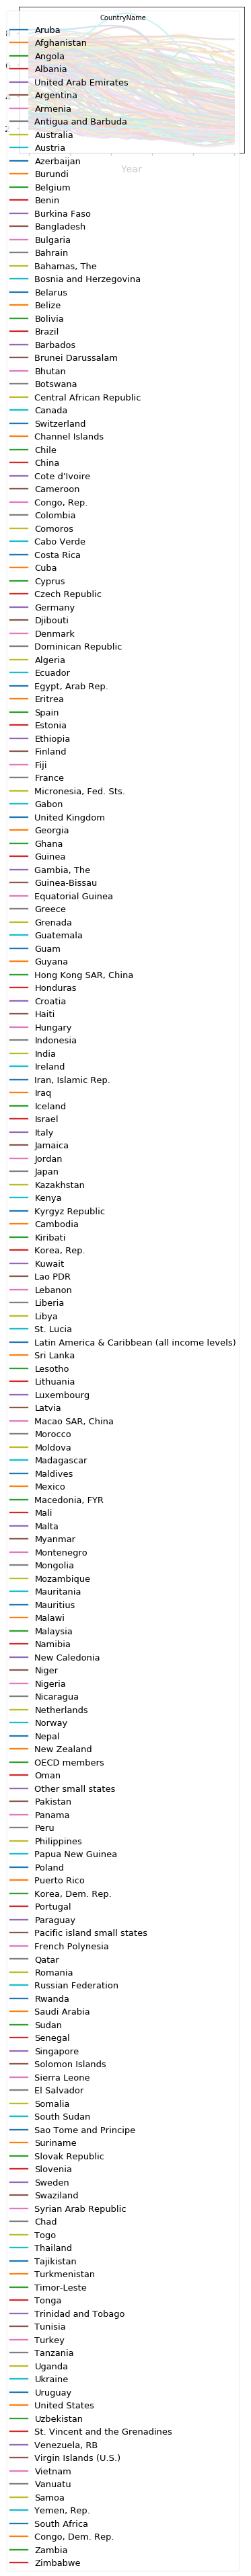

In [24]:
df2.T.plot()

# New Question: How has each Continent's Fertility Changed over Time?
**Problem**: I don't know the Continent name of every country. :-(
**Solution**: Look for Data online!

In [25]:
IFrame('http://techslides.com/list-of-countries-and-capitals', width=1000, height=600)

## Using Pandas to Scrape HTML Tables from Web Sites

In [26]:
countries = pd.read_html('http://techslides.com/list-of-countries-and-capitals', header=0)[0].set_index('Country Name')
countries.head()

,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
Country Name,,,,,
Afghanistan,Kabul,34.516667,69.183333,AF,Asia
Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
Albania,Tirana,41.316667,19.816667,AL,Europe
Algeria,Algiers,36.750000,3.050000,DZ,Africa
American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia


# Problem: Where Should the Data Go?
How do we cleanly associate our variables (Country, Continent, and our Years) in a 2D Structure?

In [27]:
df2.head()
df3 = pd.merge(left=df2, right=countries[['Continent Name']], left_index=True, right_index=True)
df3.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,Continent Name
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,North America
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,Asia
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,Africa
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,Europe
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,Asia


In [28]:
df3.set_index('Continent Name')
df3.reset_index().set_index(['Continent Name', 'index'])
df3.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,Continent Name
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,North America
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,Asia
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,Africa
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,Europe
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,Asia


In [29]:
df3.index.name = 'Country'
df3.reset_index(inplace=True)
df3.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,Continent Name
0,Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,North America
1,Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,Asia
2,Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,Africa
3,Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,Europe
4,United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,Asia


In [30]:
dfl = pd.melt(df3, id_vars=['Continent Name', 'Country'], 
        value_name='Fertility Rate', var_name='Year',
        value_vars=[col for col in df3.columns if col.isdigit()],
        )
dfl.head()

,Continent Name,Country,Year,Fertility Rate
0,North America,Aruba,1960,4.820
1,Asia,Afghanistan,1960,7.671
2,Africa,Angola,1960,7.316
3,Europe,Albania,1960,6.186
4,Asia,United Arab Emirates,1960,6.928


## Our Options: Long Variable Names, Panels, MultiIndexing, or Long DataFrames
 
  - **Long Variable Names**: "Europe_Germany".  Ugly.
  - **Panel**: a 3D version of DataFrame.  However, it has been Deprecated.
  - **MultiIndex**: Allows multiple nesting of columns. Works, but not fully supported--it's a bit finicky in practice.
  - **Long DataFrames**: Clean, Simple to Use, and Scalable!
  

## Grouping Data using Dataframe.groupby()

In [31]:
dfl['Year'] = dfl['Year'].astype(int)

In [32]:
dfl.dtypes

Continent Name     object
Country            object
Year                int64
Fertility Rate    float64
dtype: object

apply(), transform(), agg(), aggregate()

In [41]:
def mysum(values):
    return sum(values)

continents = dfl.groupby('Continent Name').sum()
continents.aggregate({'Country': [len], 'Fertility Rate': [np.sum]})

## "Gathering" Data: Reshaping into a  "Long" Table with Pandas' melt() function

In [39]:
dfl = df3.melt(id_vars=['CountryName', 'Continent Name'], value_name='FertilityRate', var_name='Year', 
         value_vars=[col for col in df3.columns if col.isdigit()])
dfl.head()

,CountryName,Continent Name,Year,FertilityRate
0,Aruba,North America,1960,4.820
1,Afghanistan,Asia,1960,7.671
2,Angola,Africa,1960,7.316
3,Albania,Europe,1960,6.186
4,United Arab Emirates,Asia,1960,6.928


## Joining DataFrames using "Join" and "Merge"

In [35]:
df3 = df2.join(countries['Continent Name']).reset_index()


## A Benefit of Long DataFrames: Simpler Querying

In [36]:
dfl.head()

,CountryName,Continent Name,Year,FertilityRate
0,NaN,North America,1960,4.820
1,NaN,Asia,1960,7.671
2,NaN,Africa,1960,7.316
3,NaN,Europe,1960,6.186
4,NaN,Asia,1960,6.928


# Building Beautiful Plots with Seaborn

In [37]:
IFrame('http://seaborn.pydata.org/', width=800, height=600)

## Use Case: Time Series Plotting with Seaborn.tsplot()
It's a bit finicky (especially with NaNs), but it handles error shading in a great way!

/home/nickdg/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


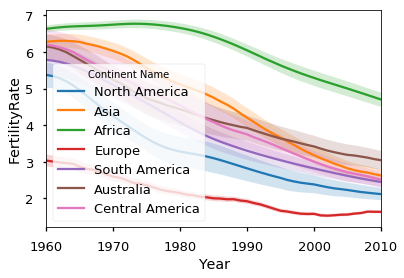

In [106]:
sns.tsplot(data=dfl, time='Year', value='FertilityRate', condition='Continent Name', unit='CountryName', ci=68)

## Use Case: Plotting Categorical Data with a Declarative Syntax

In [286]:
dfl['Decade'] = (dfl.Year.astype(float) // 10 * 10).astype(int)
dfl.head()

,CountryName,Continent Name,Year,FertilityRate,Decade
0,Aruba,North America,1960,4.820,1960
1,Andorra,Europe,1960,NaN,1960
2,Afghanistan,Asia,1960,7.671,1960
3,Angola,Africa,1960,7.316,1960
4,Albania,Europe,1960,6.186,1960


## Use Case: Building Complex Subplots with FacetGrid.map()

## Seaborn's Killer Function:  factorplot()

In [45]:
dfl.head()

,CountryName,Continent Name,Year,FertilityRate
0,Aruba,North America,1960,4.820
1,Afghanistan,Asia,1960,7.671
2,Angola,Africa,1960,7.316
3,Albania,Europe,1960,6.186
4,United Arab Emirates,Asia,1960,6.928


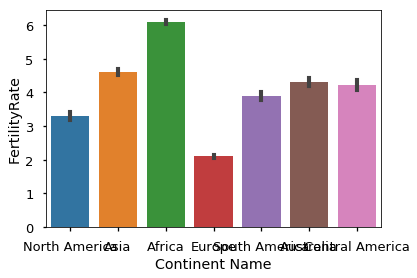

In [59]:
import seaborn as sns
sns.barplot(data=dfl, x='Continent Name', y='FertilityRate', ci=95, estimator=np.mean)

In [71]:
dfl['Year'] = dfl['Year'].astype(float)

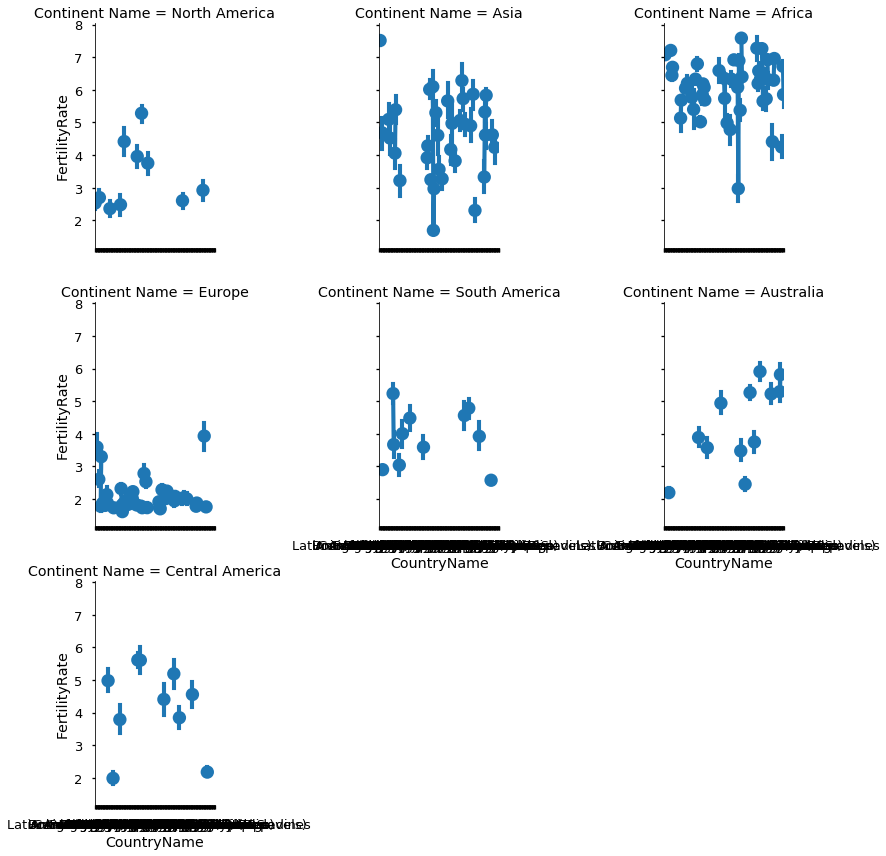

In [76]:
sns.factorplot(data=dfl, x='CountryName', y='FertilityRate', col='Continent Name', col_wrap=3)

# Doing R-Like Statistics with StatsModels

In [77]:
IFrame('http://www.statsmodels.org/stable/index.html', width=900, height=600)

## Statsmodels Uses a Statistical Modeling Sub-Language called Patsy

In [86]:
import statsmodels.formula.api as smf

model = smf.glm(data=dfl, formula='FertilityRate ~ CountryName').fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Generalized linear model
=============================================================================================================
Model:                             GLM                             AIC:                           29772.4160 
Link Function:                     identity                        BIC:                           -77946.2909
Dependent Variable:                FertilityRate                   Log-Likelihood:                -14692.    
Date:                              2018-08-15 11:56                LL-Null:                       -27402.    
No. Observations:                  9894                            Deviance:                      11291.     
Df Model:                          193                             Pearson chi2:                  1.13e+04   
Df Residuals:                      9700                            Scale:                         1.1640     
Method:                            IRLS                                                                      
-------------------------------------------------------------------------------------------------------------
                                                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                                     7.5145   0.1511  49.7404 0.0000  7.2184  7.8105
CountryName[T.Albania]                                       -3.9208   0.2137 -18.3514 0.0000 -4.3395 -3.5020
CountryName[T.Algeria]                                       -2.1140   0.2137  -9.8948 0.0000 -2.5328 -1.6953
CountryName[T.Angola]                                        -0.4367   0.2137  -2.0441 0.0409 -0.8555 -0.0180
CountryName[T.Antigua and Barbuda]                           -4.8167   0.2137 -22.5450 0.0000 -5.2355 -4.3980
CountryName[T.Argentina]                                     -4.6131   0.2137 -21.5917 0.0000 -5.0318 -4.1943
CountryName[T.Armenia]                                       -4.9099   0.2137 -22.9808 0.0000 -5.3286 -4.4911
CountryName[T.Aruba]                                         -4.9858   0.2137 -23.3362 0.0000 -5.4045 -4.5670
CountryName[T.Australia]                                     -5.3176   0.2137 -24.8891 0.0000 -5.7363 -4.8988
CountryName[T.Austria]                                       -5.7367   0.2137 -26.8508 0.0000 -6.1554 -5.3179
CountryName[T.Azerbaijan]                                    -4.2156   0.2137 -19.7313 0.0000 -4.6343 -3.7968
CountryName[T.Bahamas, The]                                  -4.6129   0.2137 -21.5910 0.0000 -5.0317 -4.1942
CountryName[T.Bahrain]                                       -2.9931   0.2137 -14.0093 0.0000 -3.4118 -2.5744
CountryName[T.Bangladesh]                                    -2.4199   0.2137 -11.3266 0.0000 -2.8387 -2.0012
CountryName[T.Barbados]                                      -5.1565   0.2137 -24.1351 0.0000 -5.5752 -4.7377
CountryName[T.Belarus]                                       -5.6389   0.2137 -26.3931 0.0000 -6.0576 -5.2202
CountryName[T.Belgium]                                       -5.6494   0.2137 -26.4422 0.0000 -6.0681 -5.2306
CountryName[T.Belize]                                        -2.5374   0.2137 -11.8763 0.0000 -2.9561 -2.1186
CountryName[T.Benin]                                         -1.0695   0.2137  -5.0061 0.0000 -1.4883 -0.6508
CountryName[T.Bhutan]                                        -2.1244   0.2137  -9.9435 0.0000 -2.5432 -1.7057
CountryName[T.Bolivia]                                       -2.2800   0.2137 -10.6715 0.0000 -2.6987 -1.8612
CountryName[T.Bosnia and Herzegovina]                        -5.3790   0.2137 -25.1767 0.0000 -5.7977 -4.9603
CountryName[T.Botswana]                                      -2.3806   0.2137 -11.1426 0.0000 -2.7994 -1.9619
CountryName[T.Brazil]        

# Want to Explore More?  Why Not OktoberFest?

In [241]:
IFrame('https://www.opengov-muenchen.de/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2', width=800, height=600)

In [242]:
okt = pd.read_csv('oktoberfestgesamt19852016.csv')
okt.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


pd.merge, pd.melt, dfl.groupby

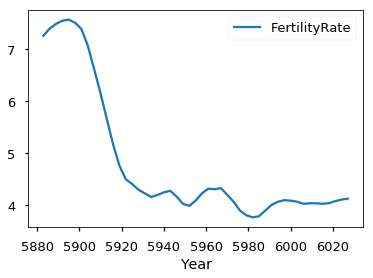

In [104]:
dd = dfl.query('CountryName == "Germany"').rolling(3)[['Year', 'FertilityRate']].aggregate(np.sum)

dd.plot(x='Year', y='FertilityRate')